In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [6]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
input_size=784  #28*28
hidden_size=100
num_classes=10
epochs=2
batch_size=100
lr=0.001


In [10]:
traindataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

In [13]:
testdataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

In [14]:
print(len(traindataset),len(testdataset))

60000 10000


In [16]:
trainloader=torch.utils.data.DataLoader(traindataset,batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testdataset,batch_size,shuffle=False)

In [22]:
firstdata=iter(trainloader)
samples,labels=next(firstdata)
print('sample',samples.shape,'Labels',labels.shape)

sample torch.Size([100, 1, 28, 28]) Labels torch.Size([100])


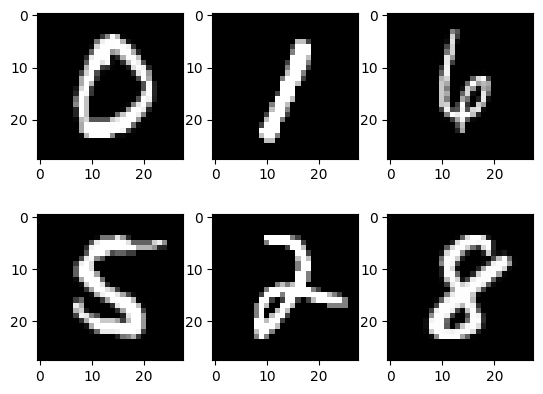

In [23]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')

plt.show()

In [24]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,output_size)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out


In [25]:
model=NeuralNet(input_size,hidden_size,num_classes)


In [27]:
criterion=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=lr)

In [28]:
total_step=len(trainloader)
for epoch in range(epochs):
  for i ,(images,labels) in enumerate(trainloader):
    #(100 1 28 28)->(100,784)
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    outputs=model(images)
    loss=criterion(outputs,labels)


    optim.zero_grad()
    loss.backward()

    optim.step()

    if(i+1)%100==0:
      print(f'Epoch {epoch}/{epochs} , step {i+1}/{total_step} , loss ={loss.item():.3f}')




Epoch 0/2 , step 100/600 , loss =0.446
Epoch 0/2 , step 200/600 , loss =0.458
Epoch 0/2 , step 300/600 , loss =0.313
Epoch 0/2 , step 400/600 , loss =0.257
Epoch 0/2 , step 500/600 , loss =0.312
Epoch 0/2 , step 600/600 , loss =0.191
Epoch 1/2 , step 100/600 , loss =0.116
Epoch 1/2 , step 200/600 , loss =0.225
Epoch 1/2 , step 300/600 , loss =0.104
Epoch 1/2 , step 400/600 , loss =0.134
Epoch 1/2 , step 500/600 , loss =0.223
Epoch 1/2 , step 600/600 , loss =0.087


In [29]:
with torch.no_grad():
  n_correct=0
  n_sample=0
  for images,labels in testloader:
     images=images.reshape(-1,28*28).to(device)
     labels=labels.to(device)

     outputs=model(images)

     _,predictions=torch.max(outputs,1)
     n_sample +=labels.shape[0]
     n_correct +=(predictions==labels).sum().item()

  acc=100.0*n_correct /n_sample
  print("accuracy ",acc)


accuracy  95.09
